In [1]:
import numpy as np
import SimpleITK as sitk

import itkwidgets
from itkwidgets import view

%matplotlib inline
import matplotlib.pyplot as plt

def compare_overlay(moving, fixed):
    farr = sitk.GetArrayFromImage(fixed).astype(np.float32)
    rarr = sitk.GetArrayFromImage(moving).astype(np.float32)

    plt.figure()
    plt.imshow(farr, 'gray', interpolation='none', alpha=0.8)
    plt.imshow(rarr, 'winter', interpolation='none', alpha=0.5)

In [3]:
movingImage = sitk.ReadImage('../sampleImages/ct_2d_moving.tif')
fixedImage  = sitk.ReadImage('../sampleImages/mri_2d.tif')

In [4]:
itkwidgets.compare(movingImage,fixedImage)

AppLayout(children=(HBox(children=(Label(value='Link:'), Checkbox(value=False, description='cmap'), Checkbox(v…

In [5]:
itkwidgets.checkerboard(movingImage,fixedImage, pattern=8)

In [7]:
params = sitk.ReadParameterFile('../elastixParameters/AffineMSE_2d.txt')
sitk.PrintParameterMap( params )

ParameterObject (0x5623afb59fa0)
  RTTI typeinfo:   elastix::ParameterObject
  Reference Count: 1
  Modified Time: 1271
  Debug: Off
  Object Name: 
  Observers: 
    none
ParameterMap 0: 
  (BSplineInterpolationOrder 1)
  (DefaultPixelValue 0)
  (ErodeMask "false")
  (FinalBSplineInterpolationOrder 3)
  (FixedImageDimension 2)
  (FixedImagePyramid "FixedRecursiveImagePyramid")
  (FixedInternalImagePixelType "float")
  (HowToCombineTransforms "Compose")
  (ImageSampler "Random")
  (Interpolator "BSplineInterpolator")
  (MaximumNumberOfIterations 1000)
  (Metric "AdvancedMeanSquares")
  (MovingImageDimension 2)
  (MovingImagePyramid "MovingRecursiveImagePyramid")
  (MovingInternalImagePixelType "float")
  (NewSamplesEveryIteration "true")
  (NumberOfResolutions 4)
  (NumberOfSpatialSamples 2048)
  (Optimizer "AdaptiveStochasticGradientDescent")
  (Registration "MultiResolutionRegistration")
  (ResampleInterpolator "FinalBSplineInterpolator")
  (Resampler "DefaultResampler")
  (ResultIma

In [8]:
elastixImageFilter = sitk.ElastixImageFilter()
elastixImageFilter.SetParameterMap(params)
elastixImageFilter.SetFixedImage(fixedImage)
elastixImageFilter.SetMovingImage(movingImage)
elastixImageFilter.Execute()
transformedMovingImage = elastixImageFilter.GetResultImage()

Installing all components.
InstallingComponents was successful.

ELASTIX version: 5.000
Command line options from ElastixBase:
-fMask    unspecified, so no fixed mask used
-mMask    unspecified, so no moving mask used
-out      ./
-threads  unspecified, so all available threads are used
Command line options from TransformBase:
-t0       unspecified, so no initial transform used

Reading images...
Reading images took 0 ms.

  A default pyramid schedule is used.
  A default pyramid schedule is used.
  The default value "false" is used instead.
  The default value "GeometricalCenter" is used instead.
Transform parameters are initialized as: [1, 0, 0, 1, 0, 0]
InitializeTransform took 0.00s
  The default value "false" is used instead.
Scales for transform parameters are: [100000, 100000, 100000, 100000, 1, 1]
Initialization of all components (before registration) took: 0 ms.
Preparation of the image pyramids took: 17 ms.

Resolution: 0
  The default value "false" is used instead.
  The def

555	1910.458957	0.000000	0.010155	6.859561	0.3
556	1956.746032	0.000000	0.010155	9.158037	0.3
557	1940.915433	0.000000	0.010155	6.922946	0.3
558	1894.994503	0.000000	0.010155	12.971367	0.3
559	1885.528961	0.000000	0.010155	19.435989	0.3
560	1867.678382	0.000000	0.010155	13.849959	0.3
561	1920.273405	0.000000	0.010155	20.468620	0.3
562	2052.581427	0.000000	0.010155	10.436680	0.3
563	1898.778453	0.999584	0.009694	7.973677	0.3
564	1790.354528	0.833282	0.009768	9.280054	0.3
565	1976.804584	0.668666	0.009842	9.283807	0.3
566	1811.250265	0.500697	0.009919	10.896702	0.3
567	1727.882225	0.332711	0.009997	12.257547	0.3
568	1794.572149	0.164717	0.010076	10.767914	0.3
569	1790.205406	0.000000	0.010155	5.586210	0.3
570	1944.892113	0.928196	0.009725	12.841187	0.3
571	1723.209282	0.829161	0.009770	11.809183	0.3
572	1849.856169	0.661550	0.009845	12.576658	0.3
573	1737.178343	0.493556	0.009922	11.803963	0.3
574	1776.246027	0.325562	0.010000	7.088142	0.3
575	2098.938998	0.157588	0.010080	7.722594	0.3
5

200	1710.877852	0.289953	0.012151	10.107067	0.3
201	1776.470484	0.000000	0.012318	16.309038	0.4
202	2026.495247	0.000000	0.012318	12.606287	0.4
203	1720.109676	0.000000	0.012318	15.873723	0.3
204	1705.259099	0.000000	0.012318	11.194236	0.3
205	1944.866155	0.999477	0.011759	6.414016	0.3
206	1888.368429	0.236996	0.012181	13.180152	0.3
207	1776.618128	0.000000	0.012318	5.039938	0.3
208	1792.162105	0.972079	0.011773	18.143092	0.3
209	1798.406871	1.116650	0.011696	7.974590	0.3
210	1852.927947	2.116648	0.011190	13.692206	0.3
211	2011.184999	1.353723	0.011572	16.300295	0.3
212	1624.738423	0.590796	0.011981	9.664310	0.3
213	1802.188673	0.000000	0.012318	13.658385	0.3
214	1614.230995	0.000000	0.012318	8.835924	0.3
215	1963.736054	0.998773	0.011759	10.935053	0.3
216	1667.185878	0.772734	0.011881	12.226701	0.3
217	1815.576974	0.009811	0.012313	14.911238	0.3
218	1740.817678	0.000000	0.012318	8.128750	0.3
219	1878.515731	0.000000	0.012318	5.843377	0.3
220	1691.415566	0.000000	0.012318	8.628775	0.3


871	1661.924003	19.277841	0.006423	6.944393	0.3
872	1810.007804	19.673933	0.006360	15.857343	0.3
873	1761.262647	20.663096	0.006209	8.690068	0.3
874	1834.173149	21.218745	0.006127	6.299560	0.3
875	1757.854640	22.178965	0.005991	11.027181	0.3
876	1871.241958	23.034710	0.005875	5.167025	0.3
877	1807.804883	24.022122	0.005746	13.730444	0.3
878	1696.896477	23.260783	0.005845	7.112815	0.3
879	1710.494374	22.498927	0.005947	11.208327	0.3
880	1779.215917	23.489111	0.005815	9.206569	0.3
881	1745.000792	23.094444	0.005867	6.428841	0.3
882	1703.870270	22.998392	0.005879	8.904986	0.3
883	1840.417562	23.158692	0.005858	11.737803	0.3
884	1829.340836	24.096113	0.005736	13.177343	0.3
885	1942.825793	23.333188	0.005835	8.521559	0.3
886	1822.538444	24.113861	0.005734	20.163656	0.3
887	1963.031275	25.113857	0.005610	14.459839	0.3
888	1827.560156	26.113857	0.005491	9.816744	0.3
889	1783.319250	25.351073	0.005581	9.618492	0.3
890	1693.830349	24.613503	0.005671	12.199513	0.3
891	1810.644202	23.889285	0.005

489	1770.055526	14.388440	0.003533	9.029838	0.3
490	1783.574255	13.683273	0.003605	10.007051	0.3
491	1891.845063	13.518909	0.003622	8.671205	0.4
492	1638.721857	14.456950	0.003526	18.879339	0.3
493	1865.225855	13.491847	0.003625	12.830448	0.3
494	1753.519991	14.491847	0.003522	8.334488	0.3
495	1934.939863	13.526865	0.003621	4.849947	0.3
496	1677.159661	13.800481	0.003592	11.338094	0.3
497	1617.970809	13.197340	0.003656	8.583697	0.3
498	1721.579445	14.054687	0.003566	10.942946	0.3
499	1894.649964	13.167456	0.003659	11.017140	0.3
500	1555.393612	14.166951	0.003555	17.349488	0.3
501	1786.939284	13.201847	0.003655	15.177675	0.3
502	1835.289384	12.238191	0.003761	18.510290	0.3
503	1657.305315	13.238191	0.003651	17.554332	0.3
504	1720.850757	14.238191	0.003548	12.393066	0.3
505	1754.966165	15.238191	0.003450	6.578916	0.3
506	1812.904633	14.273159	0.003544	14.459537	0.3
507	1935.822072	14.716184	0.003500	18.695024	0.3
508	1804.211413	13.751990	0.003597	18.201484	0.3
509	1983.711260	12.786886	

31	1703.760721	3.190007	0.002241	17.726274	0.4
32	1901.825133	4.138488	0.002157	15.455304	0.4
33	1859.595470	3.157681	0.002244	6.551839	0.4
34	1851.112449	3.706811	0.002195	21.883595	0.4
35	1944.775091	2.855556	0.002273	17.322784	0.4
36	1958.819865	1.874749	0.002370	18.954059	0.3
37	1774.542936	2.874438	0.002271	9.615108	0.3
38	2016.472928	1.893700	0.002368	9.694158	0.4
39	1877.131333	0.915956	0.002474	17.682820	0.3
40	1813.338617	0.197239	0.002558	10.736797	0.3
41	2014.983552	1.197143	0.002443	21.724897	0.4
42	1695.914997	0.216344	0.002556	8.528876	0.4
43	2039.519721	0.000000	0.002582	18.282697	0.3
44	1976.912842	0.000000	0.002582	15.117181	0.3
45	2151.434002	1.000000	0.002465	26.501617	0.3
46	1918.050853	0.019813	0.002579	9.448485	0.4
47	2083.852154	0.000000	0.002582	27.110844	0.4
48	1752.202990	0.000000	0.002582	9.952273	0.3
49	1932.902162	0.000000	0.002582	36.723230	0.4
50	1833.046397	0.000000	0.002582	11.540974	0.6
51	1823.959144	0.000000	0.002582	20.081897	0.3
52	1828.370819	0.00

606	1834.108933	23.127824	0.001229	27.148810	0.3
607	1931.371496	22.147016	0.001257	26.063738	0.3
608	1845.487613	23.147016	0.001228	22.744388	0.4
609	1726.894712	24.147016	0.001201	12.434119	0.3
610	1974.342977	23.166209	0.001228	13.127446	0.3
611	1869.056802	24.091490	0.001202	17.836643	0.3
612	1910.384391	23.130761	0.001229	12.194937	0.3
613	1892.031555	22.149954	0.001257	11.987347	0.3
614	1880.138800	21.172858	0.001286	15.874916	0.4
615	1898.951550	22.171852	0.001256	12.706837	0.3
616	1784.471057	21.199993	0.001285	13.253955	0.4
617	1923.479150	22.199991	0.001255	13.880090	0.4
618	1893.173420	21.219184	0.001284	6.289945	0.4
619	2008.369587	22.165271	0.001256	17.412895	0.4
620	1776.532453	23.160231	0.001228	13.427636	0.4
621	2011.706367	24.160228	0.001201	10.480965	0.4
622	2024.949186	25.160100	0.001175	17.545284	0.4
623	1944.118924	26.132664	0.001150	17.896527	0.3
624	1963.031637	25.153046	0.001175	8.124237	0.3
625	1886.035987	24.939580	0.001180	11.347161	0.4
626	1729.400825	24.090

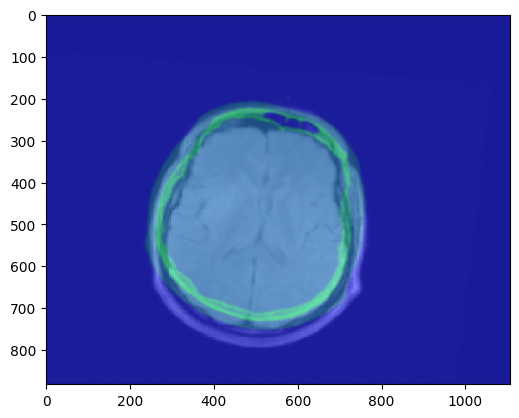

In [9]:
compare_overlay(transformedMovingImage, fixedImage)

In [18]:
paramsMI = sitk.ReadParameterFile('../elastixParameters/AffineMI_2d.txt')
sitk.PrintParameterMap( paramsMI )

Time spent on saving the results, applying the final transform etc.: 35 ms.
ParameterObject (0x5623afb30970)
  RTTI typeinfo:   elastix::ParameterObject
  Reference Count: 1
  Modified Time: 504420
  Debug: Off
  Object Name: 
  Observers: 
    none
ParameterMap 0: 
  (BSplineInterpolationOrder 1.000000)
  (DefaultPixelValue 0.000000)
  (ErodeMask "false")
  (FinalBSplineInterpolationOrder 3.000000)
  (FixedImageDimension 2.000000)
  (FixedImagePyramid "FixedRecursiveImagePyramid")
  (FixedInternalImagePixelType "float")
  (HowToCombineTransforms "Compose")
  (ImageSampler "Random")
  (Interpolator "BSplineInterpolator")
  (MaximumNumberOfIterations 1000.000000)
  (Metric "AdvancedMattesMutualInformation")
  (MovingImageDimension 2.000000)
  (MovingImagePyramid "MovingRecursiveImagePyramid")
  (MovingInternalImagePixelType "float")
  (NewSamplesEveryIteration "true")
  (NumberOfHistogramBins 32.000000)
  (NumberOfResolutions 4.000000)
  (NumberOfSpatialSamples 2048.000000)
  (Optimizer

In [19]:
elastixImageFilterMI = sitk.ElastixImageFilter()
elastixImageFilterMI.SetParameterMap(paramsMI)
elastixImageFilterMI.SetFixedImage(fixedImage)
elastixImageFilterMI.SetMovingImage(movingImage)
elastixImageFilterMI.Execute()
transformedMovingImageMI = elastixImageFilterMI.GetResultImage()

ELASTIX version: 5.000
Command line options from ElastixBase:
-fMask    unspecified, so no fixed mask used
-mMask    unspecified, so no moving mask used
-out      ./
-threads  unspecified, so all available threads are used
Command line options from TransformBase:
-t0       unspecified, so no initial transform used

Reading images...
Reading images took 0 ms.

  A default pyramid schedule is used.
  A default pyramid schedule is used.
  The default value "false" is used instead.
  The default value "GeometricalCenter" is used instead.
Transform parameters are initialized as: [1, 0, 0, 1, 0, 0]
InitializeTransform took 0.00s
  The default value "false" is used instead.
Scales for transform parameters are: [100000, 100000, 100000, 100000, 1, 1]
Initialization of all components (before registration) took: 0 ms.
Preparation of the image pyramids took: 14 ms.

Resolution: 0
  The default value "false" is used instead.
  The default value "true" is used instead.
  The default value "true" is 

344	-0.382058	3.314408	64.724057	0.006113	0.5
345	-0.427523	3.014929	65.531200	0.006283	1.5
346	-0.396623	2.715450	66.358728	0.005889	0.5
347	-0.396199	2.415971	67.207423	0.004561	0.5
348	-0.401230	2.116493	68.078109	0.004547	0.5
349	-0.405541	1.817014	68.971650	0.003904	0.5
350	-0.432602	1.517535	69.888959	0.003811	0.5
351	-0.398960	1.218056	70.830997	0.003437	0.5
352	-0.430028	0.918578	71.798778	0.005500	0.5
353	-0.448247	0.619099	72.793371	0.005400	0.5
354	-0.413090	0.319620	73.815907	0.003032	0.5
355	-0.436470	0.020142	74.867579	0.003401	0.5
356	-0.412944	0.000000	74.939386	0.002661	0.5
357	-0.402641	0.276063	73.967027	0.002582	0.5
358	-0.435783	1.276061	70.646561	0.006116	0.5
359	-0.422360	0.976582	71.609274	0.002593	0.5
360	-0.426591	0.677104	72.598588	0.003198	0.5
361	-0.425950	1.631022	69.538489	0.006006	0.5
362	-0.421199	1.331544	70.471040	0.005743	0.5
363	-0.452847	1.032065	71.428942	0.002517	0.5
364	-0.447082	0.732586	72.413245	0.002195	0.5
365	-0.422850	0.456606	73.344644	0

742	-0.729461	13.378808	45.776081	0.006169	0.5
743	-0.682327	14.352110	44.515791	0.003753	0.5
744	-0.694720	15.352110	43.291218	0.008727	0.5
745	-0.716983	15.052631	43.650826	0.003414	0.5
746	-0.697760	14.753152	44.016458	0.004825	0.5
747	-0.698107	14.453673	44.388267	0.003815	0.5
748	-0.696567	14.173292	44.742105	0.007178	0.5
749	-0.720516	15.173292	43.505223	0.004014	0.5
750	-0.692785	14.873813	43.868409	0.005494	0.5
751	-0.698155	14.574334	44.237711	0.005229	0.5
752	-0.686371	15.574334	43.028182	0.002794	0.5
753	-0.684321	15.274855	43.383415	0.005160	0.5
754	-0.702008	14.975377	43.744562	0.004113	0.5
755	-0.686937	14.675898	44.111773	0.006098	0.5
756	-0.689494	15.675898	42.909027	0.003637	0.5
757	-0.681139	15.376419	43.262287	0.007141	0.5
758	-0.685120	15.076940	43.621413	0.004935	0.5
759	-0.707444	16.076940	42.444902	0.002144	0.5
760	-0.711178	15.778615	42.789189	0.007229	0.5
761	-0.698468	15.479136	43.140471	0.004492	0.5
762	-0.701863	15.179657	43.497568	0.003962	0.5
763	-0.699475

98	-0.698051	7.220353	12.927880	0.005766	0.5
99	-0.722992	6.374614	13.327287	0.006001	0.5
100	-0.730194	7.093603	12.986207	0.011080	0.5
101	-0.744260	7.710261	12.707281	0.003252	0.5
102	-0.729500	6.843546	13.102833	0.006949	0.5
103	-0.744087	5.991306	13.516550	0.008110	0.5
104	-0.718910	6.991305	13.033667	0.004514	0.5
105	-0.730568	6.202600	13.411562	0.006802	0.5
106	-0.753850	7.202168	12.936216	0.007468	0.5
107	-0.714847	6.343155	13.342621	0.004310	0.5
108	-0.706471	5.705401	13.661257	0.006704	0.5
109	-0.723204	4.838712	14.119487	0.005055	0.5
110	-0.699355	5.752819	13.637043	0.006757	0.5
111	-0.710686	6.750658	13.146691	0.003372	0.5
112	-0.708160	6.096598	13.464027	0.010567	0.5
113	-0.746092	5.229854	13.908935	0.005789	0.5
114	-0.747510	6.229524	13.398301	0.006570	0.5
115	-0.738145	5.489445	13.772630	0.003372	0.5
116	-0.729591	5.733241	13.647030	0.005250	0.5
117	-0.720344	6.716556	13.162867	0.010000	0.5
118	-0.703482	5.849798	13.587787	0.002345	0.5
119	-0.717778	6.784019	13.130906	0.0

482	-0.764301	19.866131	8.927426	0.004959	0.5
483	-0.732433	19.191075	9.077372	0.004886	0.5
484	-0.726811	19.992785	8.899843	0.005045	0.5
485	-0.719260	19.289501	9.055196	0.007129	0.5
486	-0.736417	18.422792	9.254275	0.003709	0.5
487	-0.709745	17.575810	9.457464	0.002411	0.5
488	-0.720150	16.797348	9.652247	0.009387	0.5
489	-0.722827	16.692738	9.679035	0.004052	0.5
490	-0.729199	17.690967	9.429316	0.006706	0.5
491	-0.728824	18.516705	9.232281	0.004418	0.5
492	-0.739597	18.216710	9.302905	0.010472	0.5
493	-0.699005	19.216709	9.071586	0.005587	0.5
494	-0.729634	20.216709	8.851491	0.003094	0.5
495	-0.720319	20.960554	8.694579	0.004180	0.5
496	-0.727566	20.165979	8.862399	0.003065	0.5
497	-0.717231	21.072172	8.671512	0.005065	0.5
498	-0.716485	20.673981	8.754368	0.005564	0.5
499	-0.738577	19.853263	8.930238	0.003078	0.5
500	-0.712390	19.638588	8.977412	0.013740	0.5
501	-0.682505	18.773740	9.172618	0.002645	0.5
502	-0.728923	19.773336	8.947743	0.004382	0.5
503	-0.711972	19.639287	8.977257	0

873	-0.717314	45.451821	5.490133	0.005218	0.6
874	-0.753822	44.739142	5.549652	0.008320	0.6
875	-0.726425	45.173109	5.513257	0.006745	0.6
876	-0.725831	45.957836	5.448643	0.008054	0.7
877	-0.725612	45.091860	5.520034	0.001895	0.6
878	-0.732175	45.871294	5.455694	0.002926	0.6
879	-0.703772	46.454588	5.408518	0.005802	0.5
880	-0.704888	45.613156	5.476836	0.005320	0.5
881	-0.693276	46.600387	5.396853	0.007402	0.5
882	-0.758388	47.600381	5.318182	0.006648	0.5
883	-0.703029	46.734162	5.386194	0.003942	0.5
884	-0.734522	45.873255	5.455534	0.005148	0.5
885	-0.731191	46.872368	5.375226	0.009404	0.5
886	-0.738940	46.005615	5.444758	0.007765	0.5
887	-0.731676	47.005613	5.364695	0.008631	0.5
888	-0.738884	46.138854	5.433952	0.008809	0.5
889	-0.719511	47.138854	5.354204	0.005624	0.5
890	-0.678761	46.313354	5.419866	0.005104	0.5
891	-0.704495	47.222669	5.347626	0.002459	0.5
892	-0.703723	46.834060	5.378262	0.007420	0.5
893	-0.770371	46.030784	5.442713	0.003124	0.5
894	-0.741332	45.579092	5.479638	0

215	-0.711230	11.137254	9.111254	0.006666	0.5
216	-0.706177	10.241475	9.372499	0.006822	1.3
217	-0.709299	11.241443	9.081811	0.008225	0.5
218	-0.695739	10.346796	9.341008	0.006149	0.5
219	-0.729760	10.579268	9.272244	0.006298	0.5
220	-0.708443	9.682906	9.543121	0.006420	0.5
221	-0.724303	8.848175	9.810003	0.008096	0.5
222	-0.677520	7.952187	10.113595	0.005977	0.5
223	-0.695533	7.053625	10.437535	0.003690	0.5
224	-0.668704	7.892132	10.134617	0.007192	0.5
225	-0.697382	7.998892	10.097306	0.009570	0.5
226	-0.694108	7.100311	10.420194	0.003343	0.5
227	-0.692709	7.362649	10.323813	0.002859	0.5
228	-0.713035	6.694323	10.572950	0.008099	0.5
229	-0.694110	6.004433	10.843060	0.011147	0.5
230	-0.709056	5.105851	11.216286	0.008495	0.5
231	-0.700123	4.257766	11.592897	0.006273	0.5
232	-0.711575	3.359185	12.020545	0.008116	0.5
233	-0.713426	2.460733	12.480884	0.003540	0.5
234	-0.700354	1.838497	12.820926	0.006412	0.5
235	-0.726134	2.588465	12.413300	0.008614	0.5
236	-0.715021	3.561406	11.921577	0.0

598	-0.691337	0.089678	13.884075	0.006651	0.5
599	-0.729872	0.358556	13.709292	0.005634	0.5
600	-0.711404	1.341441	13.106168	0.008273	0.6
601	-0.723230	0.442861	13.655392	0.008190	0.6
602	-0.722595	1.442861	13.046941	0.009217	0.6
603	-0.723544	0.544280	13.591110	0.012390	0.6
604	-0.726008	1.510261	13.007876	0.003703	0.5
605	-0.684734	2.510229	12.454608	0.007305	0.5
606	-0.739371	1.616940	12.946521	0.006557	0.5
607	-0.739720	2.485759	12.467585	0.003967	0.5
608	-0.688764	1.587978	12.963120	0.007441	0.5
609	-0.703008	0.716224	13.483499	0.008356	0.5
610	-0.662847	0.000000	13.943366	0.003370	0.6
611	-0.695317	0.958645	13.334643	0.004791	0.5
612	-0.707581	1.941101	12.763585	0.015955	0.5
613	-0.686608	2.941101	12.230460	0.006543	0.5
614	-0.727695	2.042519	12.707408	0.010493	0.5
615	-0.736178	3.042519	12.178869	0.004341	0.6
616	-0.701409	4.042519	11.692541	0.003858	0.5
617	-0.694648	4.696464	11.394980	0.005390	0.5
618	-0.697389	4.526643	11.470787	0.005840	0.5
619	-0.719500	3.650254	11.878607	0

977	-0.707404	35.569710	5.176104	0.003561	0.5
978	-0.714003	35.522165	5.180458	0.006994	0.5
979	-0.712282	34.776397	5.249724	0.006874	0.5
980	-0.733684	33.882708	5.335208	0.009524	0.5
981	-0.714090	32.984128	5.424014	0.014732	0.6
982	-0.729762	32.085547	5.515827	0.004179	0.5
983	-0.728679	31.191688	5.610293	0.005865	0.5
984	-0.724470	31.525619	5.574626	0.003116	0.5
985	-0.712122	31.327627	5.595719	0.006567	0.5
986	-0.703593	30.578981	5.676938	0.002786	0.5
987	-0.657494	29.712734	5.773908	0.007409	0.5
988	-0.749109	29.424451	5.806919	0.006564	0.5
989	-0.717100	30.421413	5.694334	0.004907	0.5
990	-0.747757	31.412130	5.586697	0.008314	0.5
991	-0.711812	30.545531	5.680622	0.006336	0.5
992	-0.708313	29.670097	5.778767	0.003269	0.5
993	-0.700547	29.317007	5.819318	0.005942	0.5
994	-0.720166	28.700947	5.891451	0.009696	0.5
995	-0.695136	29.700947	5.775251	0.008706	0.5
996	-0.693262	30.700947	5.663546	0.004686	0.5
997	-0.749423	29.802368	5.763721	0.008259	0.5
998	-0.727230	30.798526	5.652877	0

253	-0.740319	9.762105	6.738797	0.008633	0.6
254	-0.730920	8.805854	6.954996	0.009536	0.6
255	-0.717021	7.849704	7.185501	0.006145	0.6
256	-0.713804	8.849704	6.944779	0.015012	0.6
257	-0.719351	9.153014	6.874921	0.006121	0.6
258	-0.699217	8.378876	7.056076	0.008093	0.6
259	-0.716277	7.425479	7.292739	0.004250	0.5
260	-0.710034	8.422265	7.045671	0.005255	0.6
261	-0.691649	9.368246	6.826196	0.005905	0.6
262	-0.720540	8.414844	7.047448	0.004912	0.6
263	-0.717559	7.459369	7.284054	0.007153	0.6
264	-0.712039	8.459367	7.036797	0.008728	0.5
265	-0.722476	9.459123	6.805829	0.006014	0.6
266	-0.727959	8.502879	7.026419	0.005113	0.6
267	-0.695719	7.546636	7.261787	0.008552	0.5
268	-0.688320	6.590386	7.513472	0.006921	0.5
269	-0.672875	7.230333	7.343151	0.007903	0.6
270	-0.725691	6.274083	7.600607	0.005362	0.5
271	-0.710018	6.356994	7.577572	0.004529	0.5
272	-0.701433	5.404716	7.850855	0.009644	0.5
273	-0.741915	5.875923	7.713208	0.002087	0.6
274	-0.703164	4.990547	7.975961	0.009045	0.5
275	-0.710

595	-0.724081	25.398135	4.467843	0.006582	0.6
596	-0.713379	26.397513	4.373638	0.007359	0.6
597	-0.711306	25.441584	4.463663	0.011327	0.6
598	-0.701455	24.485684	4.557469	0.007667	0.5
599	-0.696857	23.529844	4.655296	0.006633	0.6
600	-0.695087	24.529682	4.553065	0.013704	0.5
601	-0.678157	25.529682	4.455212	0.003956	0.6
602	-0.736646	26.518883	4.362468	0.006572	0.6
603	-0.738570	26.982244	4.320340	0.005345	0.6
604	-0.697427	26.448994	4.368893	0.007096	0.6
605	-0.666312	27.448994	4.278718	0.008408	0.6
606	-0.718194	28.448994	4.192190	0.005414	0.6
607	-0.734570	27.492743	4.274858	0.012232	0.6
608	-0.694397	26.536492	4.360852	0.006159	0.5
609	-0.719834	27.536025	4.271046	0.006144	0.6
610	-0.687521	28.536002	4.184827	0.005246	0.6
611	-0.723763	27.580589	4.267128	0.005775	0.6
612	-0.707447	26.760279	4.340418	0.005998	0.5
613	-0.719645	27.752911	4.252045	0.006356	0.6
614	-0.705730	28.459326	4.191314	0.006469	0.6
615	-0.715016	27.503083	4.273947	0.013441	0.5
616	-0.742269	28.503083	4.187610	0

943	-0.716834	36.281167	3.618983	0.006575	0.7
944	-0.740736	37.277403	3.557118	0.014020	0.6
945	-0.712675	36.321152	3.616459	0.006735	0.6
946	-0.725082	35.364901	3.677813	0.013858	0.5
947	-0.758634	35.557557	3.665285	0.012210	0.6
948	-0.702585	36.557557	3.601605	0.008588	0.6
949	-0.713506	37.557557	3.540100	0.004433	0.5
950	-0.739277	36.612431	3.598175	0.007573	0.5
951	-0.708142	35.667149	3.658197	0.006169	0.6
952	-0.686458	35.042493	3.698972	0.013095	0.6
953	-0.730561	36.042493	3.634126	0.007409	0.6
954	-0.705038	35.086242	3.696086	0.007079	0.6
955	-0.724510	34.596164	3.728667	0.007421	0.5
956	-0.699914	33.639913	3.793922	0.004072	0.6
957	-0.685793	32.683740	3.861497	0.007039	0.6
958	-0.697357	31.848037	3.922560	0.009602	0.6
959	-0.713089	32.671788	3.862357	0.008388	0.6
960	-0.720735	33.671729	3.791715	0.010874	0.5
961	-0.706603	32.745956	3.857027	0.010777	0.5
962	-0.726303	31.789705	3.926894	0.006089	0.5
963	-0.709400	32.789610	3.853896	0.003917	0.6
964	-0.714317	31.852311	3.922243	0

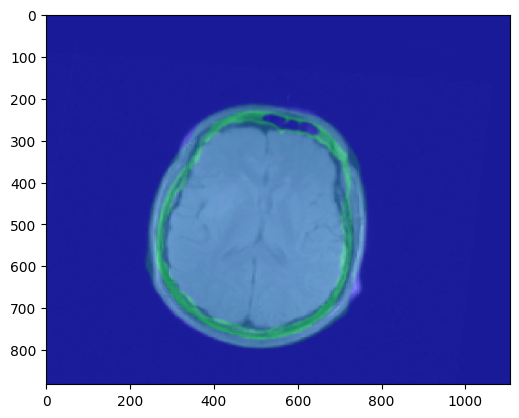

In [20]:
compare_overlay(transformedMovingImageMI, fixedImage)